# Load data

In [18]:
import yfinance as yf
df = yf.Ticker("006208.TW").history(period = "10y")
df #檢查用

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-04-15 00:00:00+08:00,25.250610,25.257859,25.207111,25.207111,70000,0.0,0.0,0.0
2014-04-16 00:00:00+08:00,25.156366,25.221613,25.156366,25.221613,3000,0.0,0.0,0.0
2014-04-17 00:00:00+08:00,25.170865,25.192614,25.163614,25.192614,90000,0.0,0.0,0.0
2014-04-18 00:00:00+08:00,25.257863,25.308611,25.257863,25.308611,6000,0.0,0.0,0.0
2014-04-21 00:00:00+08:00,25.272361,25.330357,25.272361,25.330357,7000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+08:00,93.300003,95.449997,93.300003,95.449997,4059945,0.0,0.0,0.0
2024-04-10 00:00:00+08:00,95.449997,95.500000,95.000000,95.349998,2959208,0.0,0.0,0.0
2024-04-11 00:00:00+08:00,94.800003,95.000000,94.400002,94.949997,4120034,0.0,0.0,0.0


#  Filter Data

In [19]:
df = df.filter(["Close"]) # 過濾需要的Topic
df = df.rename(columns = {"Close": "RealValue"})
df #檢查用

,RealValue
Date,
2014-04-15 00:00:00+08:00,25.207111
2014-04-16 00:00:00+08:00,25.221613
2014-04-17 00:00:00+08:00,25.192614
2014-04-18 00:00:00+08:00,25.308611
2014-04-21 00:00:00+08:00,25.330357
...,...
2024-04-09 00:00:00+08:00,95.449997
2024-04-10 00:00:00+08:00,95.349998
2024-04-11 00:00:00+08:00,94.949997


# Visualize data
check the style packages in the list

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


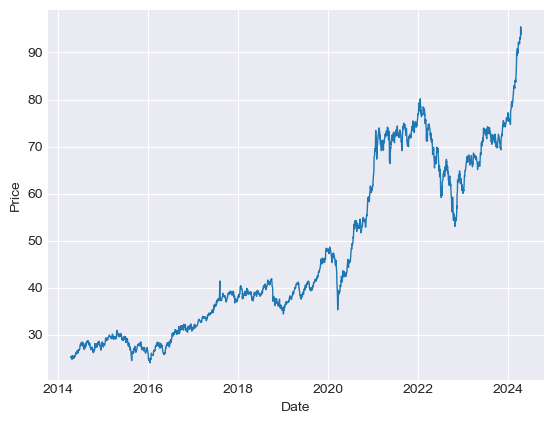

In [21]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["RealValue"], linewidth = 1)
plt.show()

# Standarize

In [22]:
from sklearn.preprocessing import MinMaxScaler

# 把數據按比例縮小至0~1範圍
scaler=MinMaxScaler(feature_range = (0, 1))
scaled_prices=scaler.fit_transform(df.values)
scaled_prices

array([[0.01602382],
       [0.01622696],
       [0.01582073],
       ...,
       [0.9929959 ],
       [0.99089476],
       [0.97688656]])

# Construct datasets

In [23]:
import numpy as np
MOVING_WIN_SIZE = 60 #設定天數

all_x, all_y = [], []
for i in range(len(scaled_prices)-MOVING_WIN_SIZE):
    x=scaled_prices[i:i+MOVING_WIN_SIZE]
    y=scaled_prices[i+MOVING_WIN_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x, all_y = np.array(all_x), np.array(all_y) # data type: python list => numpy array

In [24]:
all_x.shape

(2379, 60, 1)

In [25]:
all_y.shape

(2379, 1)

# Split dataset

In [26]:
DS_SPLIT =0.8
train_ds_size = round(all_x.shape[0] * DS_SPLIT)
train_x, train_y=all_x[:train_ds_size], all_y[:train_ds_size]
test_x, test_y=all_x[train_ds_size:], all_y[train_ds_size:]

In [27]:
train_x.shape

(1903, 60, 1)

In [28]:
train_y.shape

(1903, 1)

In [29]:
test_x.shape

(476, 60, 1)

In [30]:
test_y.shape

(476, 1)

# Construct model

In [31]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(train_x.shape[1],1
)))

model.add(LSTM(
    units=50,
    return_sequences=False
))

model.add(Dense(
    units=25
))

model.add(Dense(
    units=1
))

model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor = "val_loss", patience=10, restore_best_weights = True)
train_history = model.fit(
    train_x,
    train_y,
    validation_split=0.2,
    callbacks=[callback],
    epochs=1000
)

Epoch 1/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.4151e-05 - val_loss: 1.4931e-04
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.3863e-05 - val_loss: 4.0809e-04
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.3893e-05 - val_loss: 4.3199e-04
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.8942e-05 - val_loss: 2.6096e-04
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4528e-05 - val_loss: 1.4693e-04
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.4001e-05 - val_loss: 2.4233e-04
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.6962e-05 - val_loss: 1.5712e-04
Epoch 8/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.7124e-05 - val_loss: 8.3187e-04
Epoch 9/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.0471e-05 - val_loss: 1.4549e-04
Epoch 10/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.6695e-05 - val_loss: 2.0761e-04
Epoch 11/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/

# Evaluate Model

In [34]:
predicts = model.predict(test_x)
predicts

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


array([[0.61471486],
       [0.62866694],
       [0.6329118 ],
       [0.6339275 ],
       [0.64029145],
       [0.6302322 ],
       [0.6089861 ],
       [0.59564894],
       [0.5933107 ],
       [0.58099926],
       [0.5814195 ],
       [0.5890504 ],
       [0.60205674],
       [0.61647534],
       [0.610337  ],
       [0.60807955],
       [0.60849774],
       [0.6005006 ],
       [0.5995891 ],
       [0.59345764],
       [0.6045965 ],
       [0.6298298 ],
       [0.6491907 ],
       [0.6533295 ],
       [0.64219683],
       [0.6367224 ],
       [0.62716603],
       [0.63066906],
       [0.63388747],
       [0.63015515],
       [0.60833937],
       [0.5945691 ],
       [0.58810765],
       [0.5872354 ],
       [0.5824583 ],
       [0.5731601 ],
       [0.58028203],
       [0.5747811 ],
       [0.5602676 ],
       [0.5536516 ],
       [0.5669067 ],
       [0.5737913 ],
       [0.56865567],
       [0.5487972 ],
       [0.5158893 ],
       [0.49224728],
       [0.49063975],
       [0.489

In [35]:
predicts=scaler.inverse_transform(predicts)
predicts

array([[67.94573 ],
       [68.94173 ],
       [69.24476 ],
       [69.31727 ],
       [69.77157 ],
       [69.05347 ],
       [67.53677 ],
       [66.58468 ],
       [66.41776 ],
       [65.53889 ],
       [65.568886],
       [66.11363 ],
       [67.042114],
       [68.07141 ],
       [67.63322 ],
       [67.47206 ],
       [67.501915],
       [66.93102 ],
       [66.86596 ],
       [66.42825 ],
       [67.22342 ],
       [69.02474 ],
       [70.40685 ],
       [70.70231 ],
       [69.907585],
       [69.516785],
       [68.83459 ],
       [69.084656],
       [69.31441 ],
       [69.047966],
       [67.49061 ],
       [66.50759 ],
       [66.04633 ],
       [65.98406 ],
       [65.64304 ],
       [64.97928 ],
       [65.487686],
       [65.09499 ],
       [64.05892 ],
       [63.586624],
       [64.53287 ],
       [65.02434 ],
       [64.657715],
       [63.240086],
       [60.890896],
       [59.20317 ],
       [59.088413],
       [58.985184],
       [60.16419 ],
       [61.54504 ],


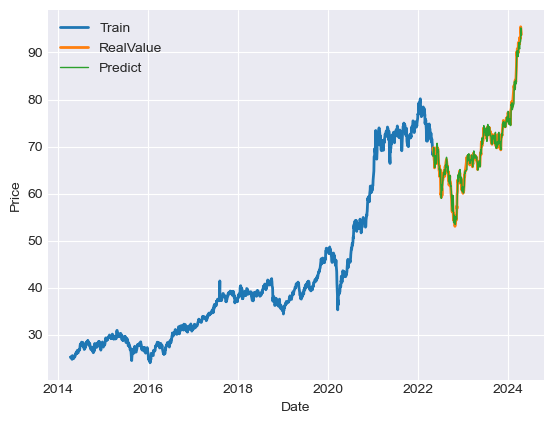

In [36]:
train_df=df[:train_ds_size + MOVING_WIN_SIZE]
test_df=df[train_ds_size+MOVING_WIN_SIZE:]
test_df=test_df.assign(Predict=predicts)

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(train_df["RealValue"], linewidth=2)
plt.plot(test_df["RealValue"], linewidth=2)
plt.plot(test_df["Predict"], linewidth=1)
plt.legend(("Train", "RealValue", "Predict"))
plt.show()

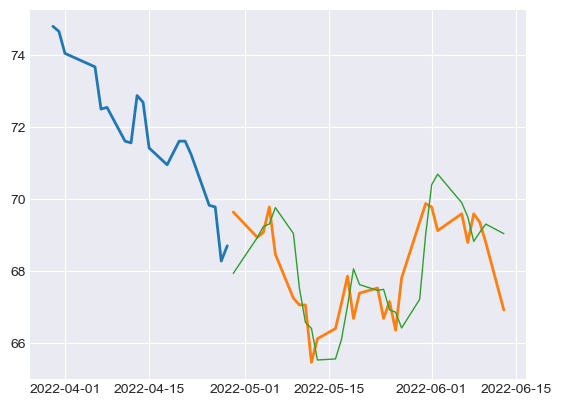

In [37]:
plt.plot(train_df["RealValue"][-20:], linewidth=2)
plt.plot(test_df["RealValue"][:30], linewidth=2)
plt.plot(test_df["Predict"][:30], linewidth=1)
plt.show()

In [38]:
test_df=test_df.assign(Shifted=test_df["RealValue"].shift(1))
test_df.iat[0, -1]=train_df.iat[-1, -1]
test_df

,RealValue,Predict,Shifted
Date,,,
2022-04-29 00:00:00+08:00,69.648277,67.945732,68.710251
2022-05-03 00:00:00+08:00,68.944771,68.941727,69.648277
2022-05-04 00:00:00+08:00,69.085464,69.244759,68.944771
2022-05-05 00:00:00+08:00,69.788986,69.317268,69.085464
2022-05-06 00:00:00+08:00,68.475746,69.771568,69.788986
...,...,...,...
2024-04-09 00:00:00+08:00,95.449997,92.406158,93.099998
2024-04-10 00:00:00+08:00,95.349998,94.382080,95.449997
2024-04-11 00:00:00+08:00,94.949997,95.211182,95.349998


In [39]:
from sklearn.metrics import mean_squared_error

predict_rmse = mean_squared_error(test_df["RealValue"], test_df["Predict"], squared = False)
predict_cvrmse = predict_rmse / test_df["RealValue"].mean() * 100
predict_cvrmse

1.2738290800307832

In [40]:
shifted_rmse = mean_squared_error(test_df["RealValue"], test_df["Shifted"], squared = False)
shifted_cvrmse = shifted_rmse / test_df["RealValue"].mean() * 100
shifted_cvrmse

1.0697864612434869